<a href="https://colab.research.google.com/github/Andbwol/Sber_lesson2/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [28]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9676 sha256=9f58711c2f21f3916905dea753938c1384cb9a5ca9ffde23bb3d4033e8c9accd
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [29]:
import wget

In [30]:
wget.download('https://people.sc.fsu.edu/~jburkardt/datasets/boston_housing/boston_housing.txt', "boston.txt")

'boston.txt'

In [36]:
df=pd.read_table('boston.txt',sep='\s+', engine='python', names = ['id', 'crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','black','lstat','medv']).set_index('id')

In [37]:
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
id,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('medv',axis=1), 
                                                    df['medv'], 
                                                    test_size=0.3, 
                                                    random_state=777)

In [41]:
print(X_train.shape)
print(X_test.shape)

(354, 13)
(152, 13)


In [42]:
from sklearn.linear_model import LinearRegression

In [44]:
my_super_second_model = LinearRegression()

In [45]:
%%time
my_super_second_model.fit(X_train, y_train)

CPU times: user 7.52 ms, sys: 927 µs, total: 8.45 ms
Wall time: 47.7 ms


LinearRegression()

In [46]:
pred = my_super_second_model.predict(X_test)

### Оценка на глаз

In [47]:
test_pred = X_test.copy()

In [48]:
test_pred['predict'] = pred
test_pred['real_medv'] = y_test

In [62]:
test_pred[['predict','real_medv']].head()

,predict,real_medv
id,,
208,17.707702,22.5
426,10.399776,8.3
409,13.935423,17.2
64,21.871811,25.0
291,33.531205,28.5


<Axes: xlabel='id'>

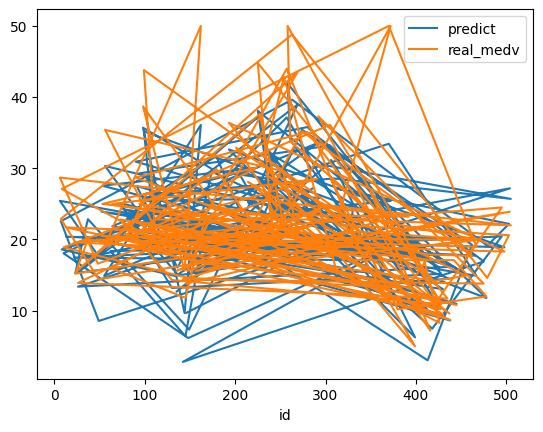

In [64]:
test_pred.plot(y=['predict','real_medv'])

In [51]:
from sklearn.metrics import mean_squared_error

In [52]:
print('Ошибка RMSE c random seed 777 =',mean_squared_error(y_test, pred))

Ошибка RMSE c random seed 777 = 25.34791337530564


### разные random seed

In [54]:
pr = []


for i in range(100):
    X_train, X_test, y_train, y_test = train_test_split(df.drop('medv',axis=1), 
                                                    df['medv'], 
                                                    test_size=0.3, 
                                                    random_state=i)
    my_super_second_model = LinearRegression()
    my_super_second_model.fit(X_train, y_train)
    pred = my_super_second_model.predict(X_test)
#     print('Ошибка c random seed=',i,' RMSE =',mean_squared_error(y_test, pred))
    pr.append(mean_squared_error(y_test, pred))

pd.Series(pr).mean()

24.37828101449488

In [ ]:
df